# Project Update: Analysis of YouTube Trending Video Data
#### Group 1 Terp Analytica: Akshay Havalgi, Austin Hom, Bekzod Akramov, Shashank Manu Rao, Vivek Ramanathan

In this document, we will provide a brief overview of the project, summarize our progress to date, and provide codes we have used in cleaning, preparing, visualizing and analyzing the data. 

### Section 1: Project Overview (Markdown)

In today's age, where most people have access to a variety of electronic devices, more and more people are consuming content using online video services, among which YouTube is the most popular. According to Google, which owns YouTube, over 400 hours of video are uploaded every minute, 100s of millions of hours are watched each day, and billions of users visit YouTube each month. Thus, YouTube provides something of interest for creators, viewers, and advertisers. YouTube videos are monetized through ad revenues, so the more views a video receives, the more ad revenue that can be generated. From the advertiser's point of view, they want to market their product to as wide an audience as possible, so they will want their ads on the most popular videos. Moreover, currently COVID-19 has caused large numbers of people to stay at home, which will undoubtedly cause a spike in the number of daily YouTube visitors.    

In our project, we are analyzing data on daily trending YouTube videos. Given YouTube’s large library of videos, it is important to filter videos to different users. YouTube uses a combination of different factors including measuring users interactions (number of views, shares, comments and likes) to determine if a video is trending. These trending videos are then made visible to users so they can see which videos are popular at a given moment. We are looking at what factors make a video become trending and if these factors are different across various countries and categories. We are also exploring why certain videos generate more views, likes and comments. 

Some of the research questions we are looking at are: 
- What are common factors among trending videos? 
- What differences are there between trending videos in different regions (ex between United States, Great Britain and India)?
- Are there factors that are generalizable across regions?
- Do videos with more likes or more comments get more views?
- Can we categorize the videos based on comments and other engagement metrics? 
- What are the most popular categories among trending videos?
- On a given trending day, would there be more dislikes than likes for any video in general?
- What time of the day would be the ideal to publish a video to become viral?
- Can we make any inferences about viewer preferences based on the analysis of the video data?
- What are the implications for advertising and monetization?

### Section 2: Milestones and Progress (Markdown)

To date, we have been able to accomplish most of the milestones we had planned on up to April 10th. We have been doing our best to mitigate the issues caused by COVID-19 and are using online tools to collaborate as efficiently as possible. For the most part, we are on track to accomplish our plans, as can be seen in the table below. We have started working on the last two tasks listed here and already have some outputs. These tasks are iterative and need to be done repeatedly as our ideas of what we want to analyze evolve and change. In terms of resources needed to accomplish our next steps, we are looking into collaborating our code using Github in order to share our code more efficiently and work more closely together.  

| **Task** | **Task Lead** | **Due Date** | **Milestone Met?** |
| --- | --- | --- | --- |
| Choosing valid relevant data for analysis | Austin | 3/12 | Yes |
| Project Proposal | Vivek | 3/13 | Yes |
| Importing and merging data | Akshay | 3/21 | Yes |
| Data cleaning | Bekzod | 3/24 | Yes |
| Data Transformation and Feature Extraction | Shashank | 3/28 | Yes |
| Creating sub-datasets for analysis | Austin | 4/1 | Yes |
| Text processing  | Akshay | 4/8 | Work in Progress |
| Visualizations  | Vivek | 4/15 | Work in Progress |


### Section 3: Data Acquisition and Cleaning Code (Markdown + Code)

We obtained the datasets from Kaggle. The datasets are a result of scraping the most relevant information from videos that are currently trending on YouTube in a specified set of countries.The data includes several months of data on daily trending YouTube videos for USA, Great Britain, Germany, Canada, France, Russia, Mexico, South Korea, Japan and India regions, with up to 200 listed trending videos per day. There is a separate dataset for each country. 

Data includes the following variables/columns: category, video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count. The category variable varies between regions, and we will find categories for a specific video in its associated JSON. One such file is included for each of the ten regions in the dataset. There is a column metadata for this dataset which provides more specific information about its contents.

For now, we have been only examining the datasets for the US, Great Britain and India. We have completed the following tasks to prepare the data for visualization and analyses over the past month:

- Choosing valid data for analysis - videos currently trending on YouTube. Multiple datasets pertaining to different regions are imported from Kaggle.
- Importing and Merging data - Datasets of various regions are imported into python and joins are created to merge the csv and json files.
- Data Cleaning - Check for missing values and duplicate data in our updated dataset
- Data Transformation - Impute missing values, rename columns, change data types
- Feature Extraction - adding relevant columns for analysis such as like/dislike ratio, difference in publish time vs trending time, and year video published/trending
- Indexing, selection, and filtering - subsetting required data for analysis such as only videos in the music category


In [1]:
import pandas as pd #load all required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt 
from pandas.io.json import json_normalize

In [2]:
#%cd /Users/akshayd/Desktop/Sem_2/Python/Project/youtube-new/

/Users/akshayd/Desktop/Sem_2/Python/Project/youtube-new


In [3]:
youtubeUS = pd.read_csv("USvideos.csv") #load US data using raw string

In [4]:
youtubeUS.shape #check dataframe dimensions

(40949, 16)

In [5]:
youtubeGB = pd.read_csv("GBvideos.csv") #load Great Britain youtube data 

In [6]:
youtubeGB.shape #check dataframe dimensions

(38916, 16)

In [7]:
youtubeIN = pd.read_csv("INvideos.csv") #load India youtube data 

In [8]:
youtubeIN.shape #check dataframe dimensions

(37352, 16)

In [9]:
youtubeIN.head(3) #check dataframe column values to get a feel of data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...


In [10]:
youtubeIN.describe() #summary statistics

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


In [11]:
us_json = pd.read_json("US_category_id.json")

In [12]:
us_json.head(3) #loading json files

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [13]:
us_json.describe()

,kind,etag,items
count,32,32,32
unique,1,1,32
top,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
freq,32,32,1


In [14]:
us_json.dtypes

kind     object
etag     object
items    object
dtype: object

In [15]:
in_json = pd.read_json("IN_category_id.json")

In [16]:
in_json.describe()

,kind,etag,items
count,31,31,31
unique,1,1,31
top,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
freq,31,31,1


In [17]:
gb_json = pd.read_json("GB_category_id.json")

In [18]:
gb_json.describe()

,kind,etag,items
count,31,31,31
unique,1,1,31
top,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
freq,31,31,1


In [19]:
youtubeUS.insert(0,"Country","US", True)
youtubeGB.insert(0,"Country","GB", True) #insert country column with country code
youtubeIN.insert(0,"Country","IN", True)
youtubeIN.head(3)

,Country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,IN,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,IN,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,IN,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...


In [20]:
youtubeUSGBIN = pd.concat([youtubeUS, youtubeGB, youtubeIN]) #concat all three dataframes

In [21]:
youtubeUSGBIN.describe() #summary statistisc

,category_id,views,likes,dislikes,comment_count
count,117217.000000,1.172170e+05,1.172170e+05,1.172170e+05,1.172170e+05
mean,19.439638,3.125416e+06,7.923513e+04,4.354511e+03,8.149208e+03
std,7.581672,1.209701e+07,2.527158e+05,3.528140e+04,3.781326e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,1.819770e+05,2.544000e+03,1.600000e+02,2.990000e+02
50%,24.000000,5.605360e+05,1.222400e+04,5.440000e+02,1.255000e+03
75%,24.000000,1.811610e+06,5.198400e+04,1.913000e+03,4.738000e+03
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [22]:
youtubeUSGBIN.tail(3) #peep into the data

,Country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
37349,IN,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...
37350,IN,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Nuabohu : Story of a rustic village girl who w...
37351,IN,wERgpPK44w0,18.14.06,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Suresh Productions,24,2018-06-10T04:29:54.000Z,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,1205,https://i.ytimg.com/vi/wERgpPK44w0/default.jpg,False,False,False,Check out Ee Nagaraniki Emaindi Trailer #EeNag...


In [23]:
youtubeUSGBIN.shape #shape of master dataframe

(117217, 17)

In [24]:
youtubeUSGBIN.dtypes #data types of cols

Country                   object
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [25]:
youtubeUSGBIN.isnull().any() #description col has some nulls

Country                   False
video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
dtype: bool

In [26]:
youtubeUSGBIN.isna().sum() #count of nulls

Country                      0
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1743
dtype: int64

In [27]:
df=youtubeUSGBIN.sample(frac=1).reset_index(drop=True) # shuffle the df for mixed country data and drop original index 
df.head(3) 

,Country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,GB,xvmTr6S00Aw,18.20.03,MY PARENTS DO MY MAKEUP,James Charles,24,2018-02-27T22:02:48.000Z,"james|""james charles""|""charles""|""makeup""|""mua""...",3091882,241613,4660,32132,https://i.ytimg.com/vi/xvmTr6S00Aw/default.jpg,False,False,False,"HI SISTERS! You've met me, my daddy, all of my..."
1,GB,LPsRp7uUXUk,17.22.12,Gender Wars: The Last Snowflake,Sargon of Akkad,25,2017-12-20T19:27:36.000Z,"star wars|""feminism""|""the last jedi""|""tlj""|""sj...",343058,27419,2081,10484,https://i.ytimg.com/vi/LPsRp7uUXUk/default.jpg,False,False,False,Spoiler: The Nazis win and this video is full ...
2,GB,DpSWgZVIfi8,17.24.11,SZA - Go Gina (Stripped) (Vevo LIFT),SZAVEVO,10,2017-11-21T17:00:00.000Z,"SZA|""LIFT SZA""|""Vevo SZA""|""Go Gina""|""SZA Go Gi...",249899,22745,141,1016,https://i.ytimg.com/vi/DpSWgZVIfi8/default.jpg,False,False,False,SZA - Go Gina (Stripped LIFT)\n\nSZA is enjoyi...


In [28]:
df["trending_date"].head(3) #col to clean to transform

0    18.20.03
1    17.22.12
2    17.24.11
Name: trending_date, dtype: object

In [29]:
df["trending_date"].apply(type).value_counts() #see col type : is a string

<class 'str'>    117217
Name: trending_date, dtype: int64

In [30]:
df["trending_date"] = pd.to_datetime(df["trending_date"], format = "%y.%d.%m") #convert to date time object with proper format
df["trending_date"].head(3)

0   2018-03-20
1   2017-12-22
2   2017-11-24
Name: trending_date, dtype: datetime64[ns]

In [31]:
df["publish_time"].head(3) #col to clean and trasnform

0    2018-02-27T22:02:48.000Z
1    2017-12-20T19:27:36.000Z
2    2017-11-21T17:00:00.000Z
Name: publish_time, dtype: object

In [32]:
df["publish_time"].apply(type).value_counts() #see col type : is a string

<class 'str'>    117217
Name: publish_time, dtype: int64

In [33]:
df["publish_time"] = df["publish_time"].str.replace("\.\d+Z\Z","") #remove micro seconds and unwanted Z at end
df["publish_time"].head(3)

0    2018-02-27T22:02:48
1    2017-12-20T19:27:36
2    2017-11-21T17:00:00
Name: publish_time, dtype: object

In [34]:
df["publish_date"] = df["publish_time"].str.split("T").str[0] #split on 'T' and form two seperate columns -date & time
df["publish_time"] = df["publish_time"].str.split("T").str[1]
df.head(3)

,Country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
0,GB,xvmTr6S00Aw,2018-03-20,MY PARENTS DO MY MAKEUP,James Charles,24,22:02:48,"james|""james charles""|""charles""|""makeup""|""mua""...",3091882,241613,4660,32132,https://i.ytimg.com/vi/xvmTr6S00Aw/default.jpg,False,False,False,"HI SISTERS! You've met me, my daddy, all of my...",2018-02-27
1,GB,LPsRp7uUXUk,2017-12-22,Gender Wars: The Last Snowflake,Sargon of Akkad,25,19:27:36,"star wars|""feminism""|""the last jedi""|""tlj""|""sj...",343058,27419,2081,10484,https://i.ytimg.com/vi/LPsRp7uUXUk/default.jpg,False,False,False,Spoiler: The Nazis win and this video is full ...,2017-12-20
2,GB,DpSWgZVIfi8,2017-11-24,SZA - Go Gina (Stripped) (Vevo LIFT),SZAVEVO,10,17:00:00,"SZA|""LIFT SZA""|""Vevo SZA""|""Go Gina""|""SZA Go Gi...",249899,22745,141,1016,https://i.ytimg.com/vi/DpSWgZVIfi8/default.jpg,False,False,False,SZA - Go Gina (Stripped LIFT)\n\nSZA is enjoyi...,2017-11-21


In [35]:
df["publish_date"].head(3) #col to convert to date

0    2018-02-27
1    2017-12-20
2    2017-11-21
Name: publish_date, dtype: object

In [36]:
df["publish_date"].apply(type).value_counts() #col is a string 

<class 'str'>    117217
Name: publish_date, dtype: int64

In [37]:
df["publish_date"] = pd.to_datetime(df["publish_date"], format = "%Y.%m.%d") #convert to date time object with proper format
df["publish_date"].head(3)

0   2018-02-27
1   2017-12-20
2   2017-11-21
Name: publish_date, dtype: datetime64[ns]

In [38]:
df["time_to_trend"] = df["trending_date"]-df["publish_date"] #time to trend for a video  - timedelta object
df.head(3)

,Country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,time_to_trend
0,GB,xvmTr6S00Aw,2018-03-20,MY PARENTS DO MY MAKEUP,James Charles,24,22:02:48,"james|""james charles""|""charles""|""makeup""|""mua""...",3091882,241613,4660,32132,https://i.ytimg.com/vi/xvmTr6S00Aw/default.jpg,False,False,False,"HI SISTERS! You've met me, my daddy, all of my...",2018-02-27,21 days
1,GB,LPsRp7uUXUk,2017-12-22,Gender Wars: The Last Snowflake,Sargon of Akkad,25,19:27:36,"star wars|""feminism""|""the last jedi""|""tlj""|""sj...",343058,27419,2081,10484,https://i.ytimg.com/vi/LPsRp7uUXUk/default.jpg,False,False,False,Spoiler: The Nazis win and this video is full ...,2017-12-20,2 days
2,GB,DpSWgZVIfi8,2017-11-24,SZA - Go Gina (Stripped) (Vevo LIFT),SZAVEVO,10,17:00:00,"SZA|""LIFT SZA""|""Vevo SZA""|""Go Gina""|""SZA Go Gi...",249899,22745,141,1016,https://i.ytimg.com/vi/DpSWgZVIfi8/default.jpg,False,False,False,SZA - Go Gina (Stripped LIFT)\n\nSZA is enjoyi...,2017-11-21,3 days


In [39]:
df["time_to_trend"].apply(type).value_counts() #time delta object

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>    117217
Name: time_to_trend, dtype: int64

In [40]:
df["time_to_trend"].head(3)/3 #arithmetic operations possible on this !!

0   7 days 00:00:00
1   0 days 16:00:00
2   1 days 00:00:00
Name: time_to_trend, dtype: timedelta64[ns]

In [41]:
df["time_to_trend"].max() #max trend time

Timedelta('4215 days 00:00:00')

In [42]:
df.dtypes #check all col data type again

Country                            object
video_id                           object
trending_date              datetime64[ns]
title                              object
channel_title                      object
category_id                         int64
publish_time                       object
tags                               object
views                               int64
likes                               int64
dislikes                            int64
comment_count                       int64
thumbnail_link                     object
comments_disabled                    bool
ratings_disabled                     bool
video_error_or_removed               bool
description                        object
publish_date               datetime64[ns]
time_to_trend             timedelta64[ns]
dtype: object

In [43]:
df["tags"].head(3) #col to extract information

0    james|"james charles"|"charles"|"makeup"|"mua"...
1    star wars|"feminism"|"the last jedi"|"tlj"|"sj...
2    SZA|"LIFT SZA"|"Vevo SZA"|"Go Gina"|"SZA Go Gi...
Name: tags, dtype: object

In [44]:
df["tags"].apply(type).value_counts() #object with all rows in col as string

<class 'str'>    117217
Name: tags, dtype: int64

In [45]:
countlist=[]
for i in df["tags"]: #count the no. of tags ( pipes '|' plus one if any tags exist) to see if tag affects popularity
    if("|" in i):
        count=1
        for j in i:
            if(j == "|"):
                count+=1
        countlist.append(count)
    else:
        countlist.append(0)

countlist[40:50] #see 10 random tag counts

[41, 14, 26, 36, 24, 6, 6, 39, 18, 7]

In [46]:
df["Tag_count"]= countlist #add a col for tag count
df.head(3)

,Country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,time_to_trend,Tag_count
0,GB,xvmTr6S00Aw,2018-03-20,MY PARENTS DO MY MAKEUP,James Charles,24,22:02:48,"james|""james charles""|""charles""|""makeup""|""mua""...",3091882,241613,4660,32132,https://i.ytimg.com/vi/xvmTr6S00Aw/default.jpg,False,False,False,"HI SISTERS! You've met me, my daddy, all of my...",2018-02-27,21 days,24
1,GB,LPsRp7uUXUk,2017-12-22,Gender Wars: The Last Snowflake,Sargon of Akkad,25,19:27:36,"star wars|""feminism""|""the last jedi""|""tlj""|""sj...",343058,27419,2081,10484,https://i.ytimg.com/vi/LPsRp7uUXUk/default.jpg,False,False,False,Spoiler: The Nazis win and this video is full ...,2017-12-20,2 days,10
2,GB,DpSWgZVIfi8,2017-11-24,SZA - Go Gina (Stripped) (Vevo LIFT),SZAVEVO,10,17:00:00,"SZA|""LIFT SZA""|""Vevo SZA""|""Go Gina""|""SZA Go Gi...",249899,22745,141,1016,https://i.ytimg.com/vi/DpSWgZVIfi8/default.jpg,False,False,False,SZA - Go Gina (Stripped LIFT)\n\nSZA is enjoyi...,2017-11-21,3 days,16


In [47]:
df["Tag_count"].apply(type).value_counts() #col is an integer

<class 'int'>    117217
Name: Tag_count, dtype: int64

In [48]:
df.corr() #correlation matrix

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Tag_count
category_id,1.000000,-0.183595,-0.198128,-0.043120,-0.084678,0.046372,0.015441,-0.025835,0.102668
views,-0.183595,1.000000,0.794798,0.410891,0.496715,-0.011090,-0.003056,0.010737,-0.027223
likes,-0.198128,0.794798,1.000000,0.452533,0.766640,-0.038504,-0.032181,0.010439,-0.048057
dislikes,-0.043120,0.410891,0.452533,1.000000,0.742981,-0.009419,-0.012668,0.009101,0.013538
comment_count,-0.084678,0.496715,0.766640,0.742981,1.000000,-0.031945,-0.021371,0.004624,-0.011302
comments_disabled,0.046372,-0.011090,-0.038504,-0.009419,-0.031945,1.000000,0.384370,-0.004396,-0.034442
ratings_disabled,0.015441,-0.003056,-0.032181,-0.012668,-0.021371,0.384370,1.000000,-0.003044,-0.051538
video_error_or_removed,-0.025835,0.010737,0.010439,0.009101,0.004624,-0.004396,-0.003044,1.000000,0.005488
Tag_count,0.102668,-0.027223,-0.048057,0.013538,-0.011302,-0.034442,-0.051538,0.005488,1.000000


## Fetching the categories from the json files to df dataframe

In [49]:
in_json.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [50]:
#getting the ids and categories from India
recs=in_json['items']
in_cat=json_normalize(recs)[['id','snippet.title']]
#getting the ids and categories from USA
recs_us=us_json['items']
us_cat=json_normalize(recs_us)[['id','snippet.title']]
#getting the ids and categories from GB
recs_gb=gb_json['items']
gb_cat=json_normalize(recs_gb)[['id','snippet.title']]
#merging indian and USA categories
categories=pd.merge(in_cat,us_cat,on='id',how='outer')
#merging categories with GB categories
categories=pd.merge(categories,gb_cat,on='id',how='outer')
#dropping unnecessary columns
categories=categories.drop(['snippet.title_x','snippet.title'],axis=1).rename(columns={'snippet.title_y':'category'})

In [51]:
categories.dtypes

id          object
category    object
dtype: object

In [52]:
df.dtypes

Country                            object
video_id                           object
trending_date              datetime64[ns]
title                              object
channel_title                      object
category_id                         int64
publish_time                       object
tags                               object
views                               int64
likes                               int64
dislikes                            int64
comment_count                       int64
thumbnail_link                     object
comments_disabled                    bool
ratings_disabled                     bool
video_error_or_removed               bool
description                        object
publish_date               datetime64[ns]
time_to_trend             timedelta64[ns]
Tag_count                           int64
dtype: object

In [53]:
#converting id column of categories to int to merge with the original dataframe
categories['id']=categories['id'].astype('int')

In [54]:
#id column has been converted into integer
categories.dtypes

id           int64
category    object
dtype: object

In [55]:
#adding categories column to the main dataframe "df"
df=pd.merge(left=df,right=categories,left_on='category_id',right_on='id')

In [56]:
#dropping id column from main dataframe
df=df.drop('id',axis=1)

## Creating "likeability ratio"

We have created a new variable called "likeability ratio" which is the ratio of the number of likes to the number of dislikes. To analyse the hypothesis that does more likes account for more views, in order to achieve that we are taking into account likeability ratio.

In [57]:
df['likeability_ratio']=df['likes']/df['dislikes'].replace(0,1)

In [58]:
#NOTE: for channel_title such '9-1-1 on FOX', '90s Commercials', there are zero dislikes. We need to filter 
#such records and substitute 1 for 0
df[df.channel_title=='9-1-1 on FOX']

,Country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,time_to_trend,Tag_count,category,likeability_ratio
381,US,3rhw4KgcvFM,2018-02-05,First Responders Arrive To The Collapsed Floor...,9-1-1 on FOX,24,02:00:20,"9-1-1|""first responders""|""police""|""firefighter...",1426,14,...,https://i.ytimg.com/vi/3rhw4KgcvFM/default.jpg,False,False,False,First responders arrive to a collapsed floor d...,2018-02-01,4 days,36,Entertainment,14.0
8784,US,3rhw4KgcvFM,2018-02-04,First Responders Arrive To The Collapsed Floor...,9-1-1 on FOX,24,02:00:20,"9-1-1|""first responders""|""police""|""firefighter...",1313,12,...,https://i.ytimg.com/vi/3rhw4KgcvFM/default.jpg,False,False,False,First responders arrive to a collapsed floor d...,2018-02-01,3 days,36,Entertainment,12.0
14211,US,3rhw4KgcvFM,2018-02-03,First Responders Arrive To The Collapsed Floor...,9-1-1 on FOX,24,02:00:20,"9-1-1|""first responders""|""police""|""firefighter...",1172,12,...,https://i.ytimg.com/vi/3rhw4KgcvFM/default.jpg,False,False,False,First responders arrive to a collapsed floor d...,2018-02-01,2 days,36,Entertainment,12.0


In [59]:
#Likeability ratios of videos belonging to channel titles above 300 on average
df_ch_mean=df.groupby('channel_title',as_index=False)['likeability_ratio'].mean()
df_ch_mean_subset = df_ch_mean[df_ch_mean['likeability_ratio']>300]
df_ch_mean_subset.sort_values('likeability_ratio',ascending=False).head()

,channel_title,likeability_ratio
1852,Kris Wu,59188.692483
3184,Smyang Piano,1484.472222
177,Amber Liu,726.046418
969,Duan Mackenzie,619.420635
2051,MONSTA X,616.814385


In [60]:
#Likeability ratios of videos belonging to all categories on average
df_cat_mean=df.groupby('category',as_index=False)['likeability_ratio'].mean()
df_cat_mean.sort_values('likeability_ratio',ascending=False).head()

,category,likeability_ratio
8,Music,110.808898
12,Pets & Animals,64.124067
2,Education,45.686922
6,Howto & Style,44.502059
11,People & Blogs,43.187559


## Data Visualization

We have also done some preliminary analysis of the data to find answers to some of our research questions. 

### Scatter plot between Tag Count and Likes

From the plot below, we find that videos with Tag counts between 4 and 10 have a very high number of likes compared to other Tag count values.

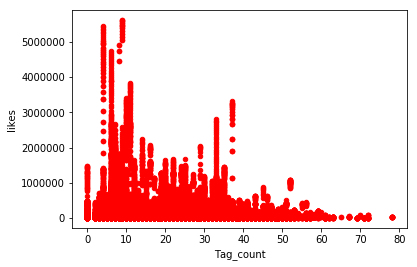

In [61]:
df.plot(kind='scatter',x='Tag_count',y='likes',color='red') #between tag count and time to trend
plt.show()

### Heatmap of correlations between quantitative variables

As can be seen in the heatmap below, the correlation coefficient between views and likes is 0.8, which means there's a strong relationship between the two. This makes sense as we would expect people to watch videos that are widely liked and people to watch and re-watch the videos they like. There are also strong relationships between comment counts and likes, and comments counts and dislikes, which is also expected.

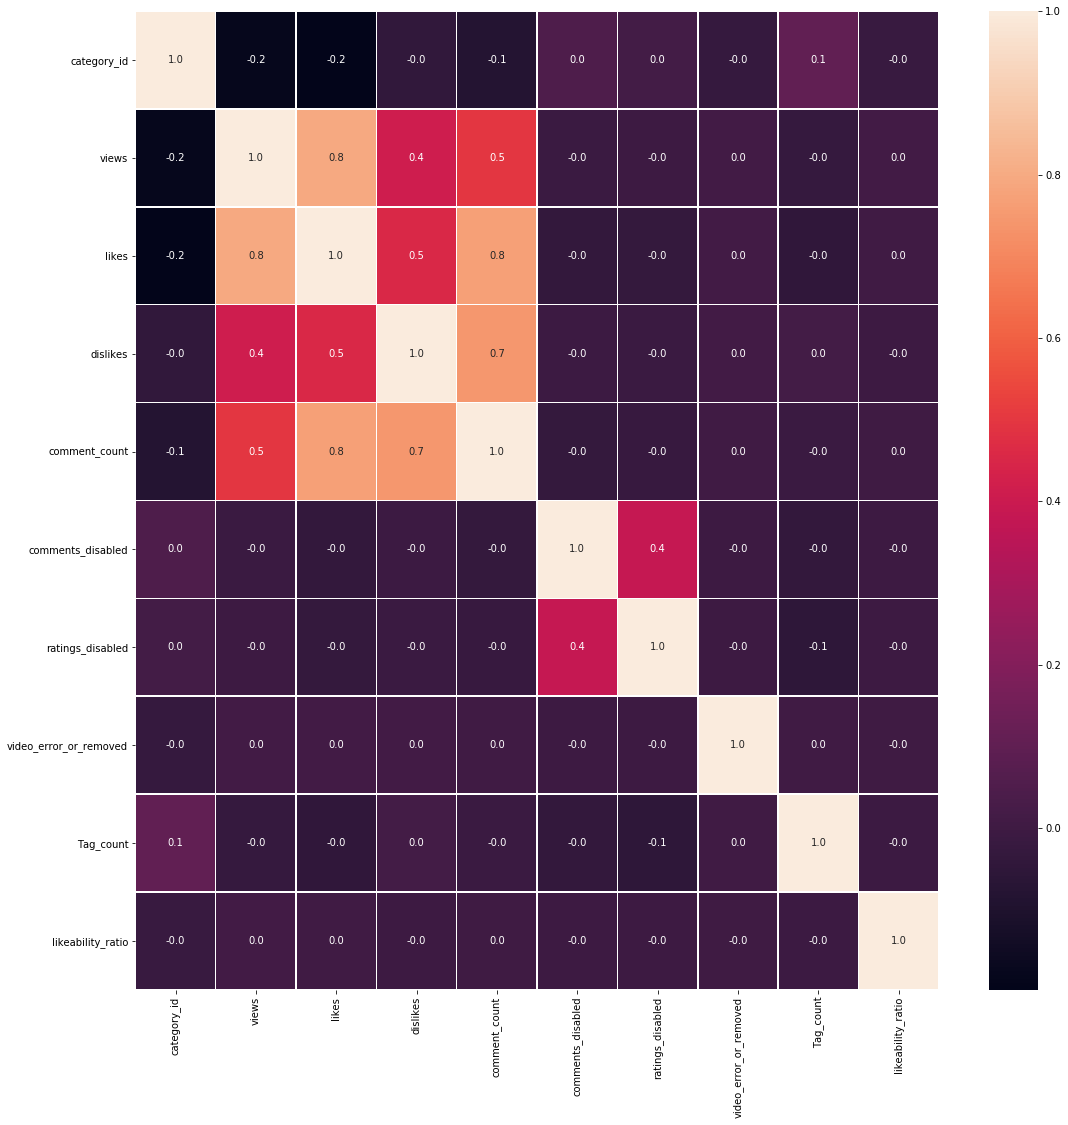

In [62]:
#create a heat map of correlations between variables to identify any quantitative relationships

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### Likeability ratio of different Channel titles and Categories

In the bar chart below, we see that the difference in the likeability ratio of the Channel title 'Kris Wu' and the other channel titles which have a likeability ratio above 300 is very large.

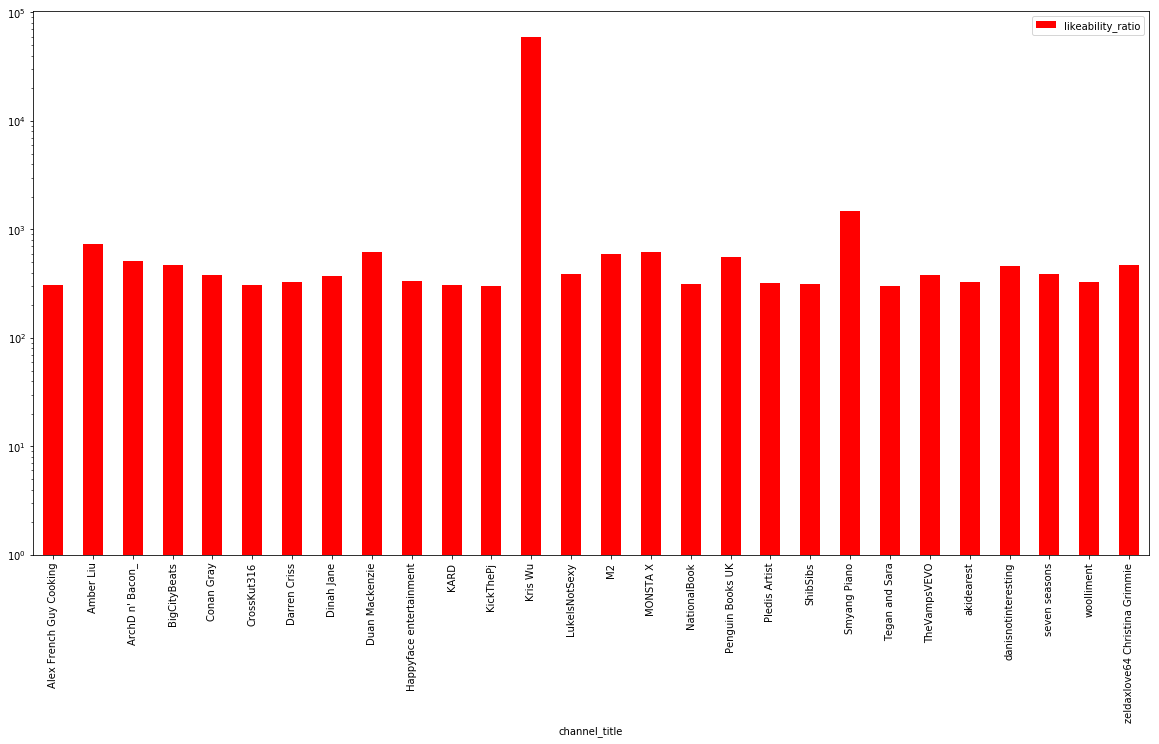

In [63]:
# Bar plot to show channel titles having average likeability ratio above 300 and their average likeability ratio values
df_ch_mean_subset.plot.bar('channel_title','likeability_ratio',log=True,color='red',figsize=(20,10))

From the bar plot below, the likeability ratios of Music category is the highest among all categories.

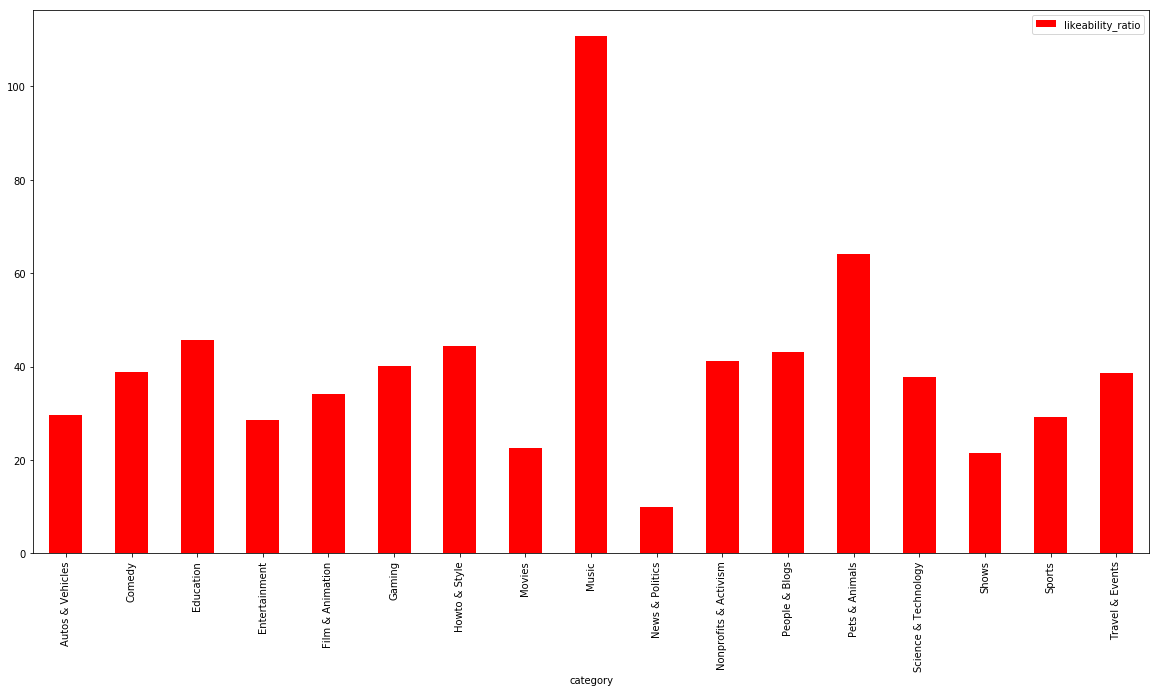

In [64]:
# Bar plot to show categories and their average likeability ratio values
df_cat_mean.plot.bar('category','likeability_ratio',log=False,color='red',figsize=(20,10))

#### Insights

For new Youtube video makers, making videos related to the Music category and Pets & Animals is advisable because they have greater like to dislike ratios.